# CountVectorizer e TF-IDF 

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["Take a look into the beauty of the word embedding.",
        "The word vectorizer is the most basic word embedding"]
cv = CountVectorizer()
cv.fit(text)

In [ ]:
text_vector = cv.transform(text)

In [ ]:
text_vector.toarray()

In [ ]:
cv.vocabulary_

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer()

vectors = tfidf.fit_transform(text)
feature_names = tfidf.get_feature_names()
print(f"Feature \n{feature_names}")

In [ ]:
matrix = vectors.todense()
denselist = matrix.tolist()

df = pd.DataFrame(denselist, columns=feature_names)
print(f"Final result of Tf-Idf \n {df}")

# Trabalhando com modelos pré-treinados

## Word2Vec e FastText

## Importando biblioteca KeyedVectors

In [3]:
from gensim.models import KeyedVectors, Word2Vec, FastText

## Arquivo do modelo pré-treinado (upload da maquina local)

In [ ]:
# file = "Word2Vec/cbow_s50.txt"
# file = "Word2Vec/cbow_s300.txt"

# file = "FastText/cbow_s50.txt"
# file = "FastText/cbow_s300.txt"

# file = "Wang2Vec/cbow_s50.txt"
# file = "Wang2Vec/cbow_s300.txt"

# file = "GloVe/glove_s50.txt"
# file = "GloVe/glove_s300.txt"

# file = "Word2Vec/pt.bin"
# file = "FastText/pt.bin"

## Arquivo do modelo pré-treinado (upload por url)

In [4]:
# Modelos pre-treinados da NILC
# Site: http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc

# word2vec cbow - 50 dimensões
# !wget "http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s50.zip" -O word2vec_cbow_s50.zip
# !unzip word2vec_cbow_s50.zip -d word2vec
# file = 'word2vec/cbow_s50.txt'

# # word2vec skip-gram - 50 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s50.zip' -O word2vec_skip_s50.zip
# !unzip word2vec_skip_s50.zip -d word2vec
# file = 'word2vec/skip_s50.txt'

# # word2vec cbow - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/word2vec/cbow_s300.zip' -O word2vec_cbow_s300.zip
# !unzip word2vec_cbow_s300.zip -d word2vec
# file = 'word2vec/cbow_s300.txt'

# # word2vec skip-gram - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/word2vec/skip_s300.zip' -O word2vec_skip_s300.zip
# !unzip word2vec_skip_s300.zip -d word2vec
# file = 'word2vec/skip_s300.txt'

# Modelos pre-treinados do repositório Kyubyong/wordvectors

# # word2vec - 300 dimensões
# !wget 'https://drive.google.com/open?id=0B0ZXk88koS2KRDcwcV9IVWFTeUE' -O word2vec2.zip
# !mkdir word2vec_2
# !unzip word2vec.zip -d word2vec2
# file = 'word2vec2/pt.bin'

# # fasttext - 300 dimensões
!wget 'https://www.dropbox.com/s/nl7l8kqky0x94cv/pt.tar.gz?dl=0' -O fasttext.tar.gz
!mkdir fasttext_2
!tar -xzf fasttext.tar.gz -C fasttext_2/
file = 'fasttext_2/pt.bin'

## Definindo a dimensionalidade e carregando o modelo

In [ ]:
# Carregando modelo Word2Vec

# model = KeyedVectors.load_word2vec_format("pt.bin", binary=False)
model = Word2Vec.load('pt.bin')

In [5]:
# Para os modelos do repositorio Kyubyong/wordvectors

# model = Word2Vec.load(file)
model = FastText.load_fasttext_format(file)

## Testando analogias e semelhanças de palavras

In [ ]:
# rei + mulher - homem = rainha

# most_similar(self, positive=None, 
#         negative=None, 
#         topn=10, 
#         restrict_vocab=None, 
#         indexer=None)

model.most_similar(positive=[''])

# model.most_similar(positive=['carro'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


KeyError: ignored

In [12]:
# distance(w1, w2)

model.distance("pão", "carro")

# Para modelos carregados com FastText

# model.wv.wmdistance("pão", "carro")

2.946915973819542

In [13]:
# n_similarity(ws1, ws2)

model.n_similarity(['sushi', 'shopping'], ['japanese', 'restaurant'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


0.59546393

In [ ]:
sentence_one = 'Eu enxergo bem como uma coruja'.lower().split()
sentence_two = 'Eu tenho olhos de coruja'.lower().split()

model.wmdistance(sentence_one, sentence_two)

Help on method wmdistance in module gensim.models.keyedvectors:

wmdistance(document1, document2) method of gensim.models.keyedvectors.Word2VecKeyedVectors instance
    Compute the Word Mover's Distance between two documents.
    
    When using this code, please consider citing the following papers:
    
    * `Ofir Pele and Michael Werman "A linear time histogram metric for improved SIFT matching"
      <http://www.cs.huji.ac.il/~werman/Papers/ECCV2008.pdf>`_
    * `Ofir Pele and Michael Werman "Fast and robust earth mover's distances"
      <https://ieeexplore.ieee.org/document/5459199/>`_
    * `Matt Kusner et al. "From Word Embeddings To Document Distances"
      <http://proceedings.mlr.press/v37/kusnerb15.pdf>`_.
    
    Parameters
    ----------
    document1 : list of str
        Input document.
    document2 : list of str
        Input document.
    
    Returns
    -------
    float
        Word Mover's distance between `document1` and `document2`.
    
    Warnings
    ----

In [ ]:
# similarity(w1, w2)

model.similarity('woman', 'man')

Help on method similarity in module gensim.models.keyedvectors:

similarity(w1, w2) method of gensim.models.keyedvectors.Word2VecKeyedVectors instance
    Compute cosine similarity between two words.
    
    Parameters
    ----------
    w1 : str
        Input word.
    w2 : str
        Input word.
    
    Returns
    -------
    float
        Cosine similarity between `w1` and `w2`.



In [ ]:
# doesnt_match(words)

model.doesnt_match("café carro almoço jantar".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'carro'

# Plotando gráfico com T-SNE e Matplotlib

In [6]:
## Referencia: https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

# Palavras bases
keys = ['Campinas', 'Python', 'domingo', 'Twitter', 'bacharel', 'delivery', 'eleição', 'expansão',
        'experiência', 'finanças', 'comida', 'paz', 'liberação', 'guerra']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [7]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

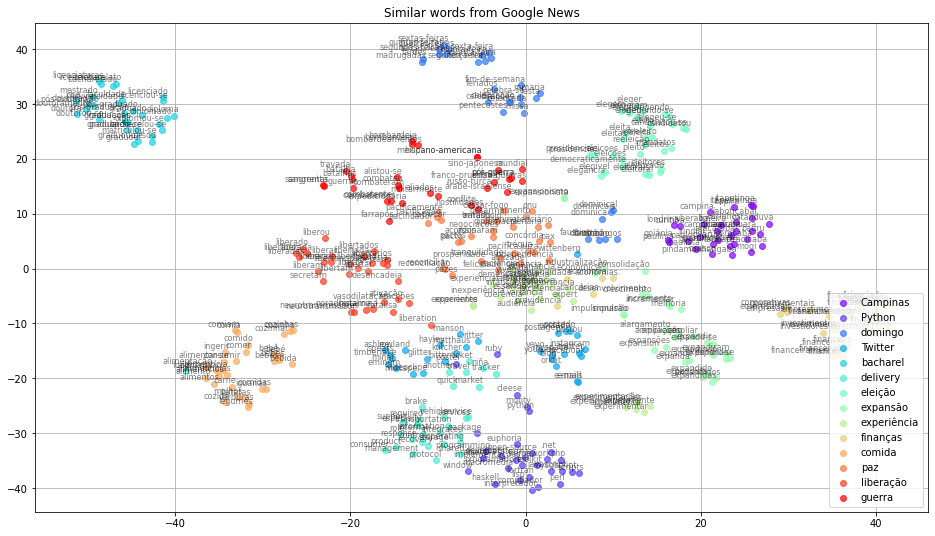

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_2d, word_clusters, 0.7,
                        'similar_words.png')

In [10]:
tsne_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_3d = tsne_3d.fit_transform(embedding_clusters)

from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'War and Peace', embeddings_3d, a=0.1)

ValueError: ignored

## Outra forma de plotar os gráficos

In [ ]:
## Método funcional para modélos carregados com KeyedVectors.load_word2vec_format

# dimensionalidade do word vector

vector_dim = 300
# vector_dim = 50

In [ ]:
import re
import os, string
from __future__ import print_function
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)

def clean_str(text):
    
    text = re.sub(r'[^A-Za-z]+', ' ', text)

    return text

In [ ]:
# Limita o número de tokens que serão visualizados
limit = 500

# Obtendo Tokens e vetores
words = []
embedding = np.array([])
i = 0

for word in model.vocab:
    # Interrompe o loop se o limite exceder
    if i == limit: break
    
    words.append(clean_str(word))
    embedding = np.append(embedding, model[word])
    i += 1
    
embedding = embedding.reshape(limit, vector_dim)

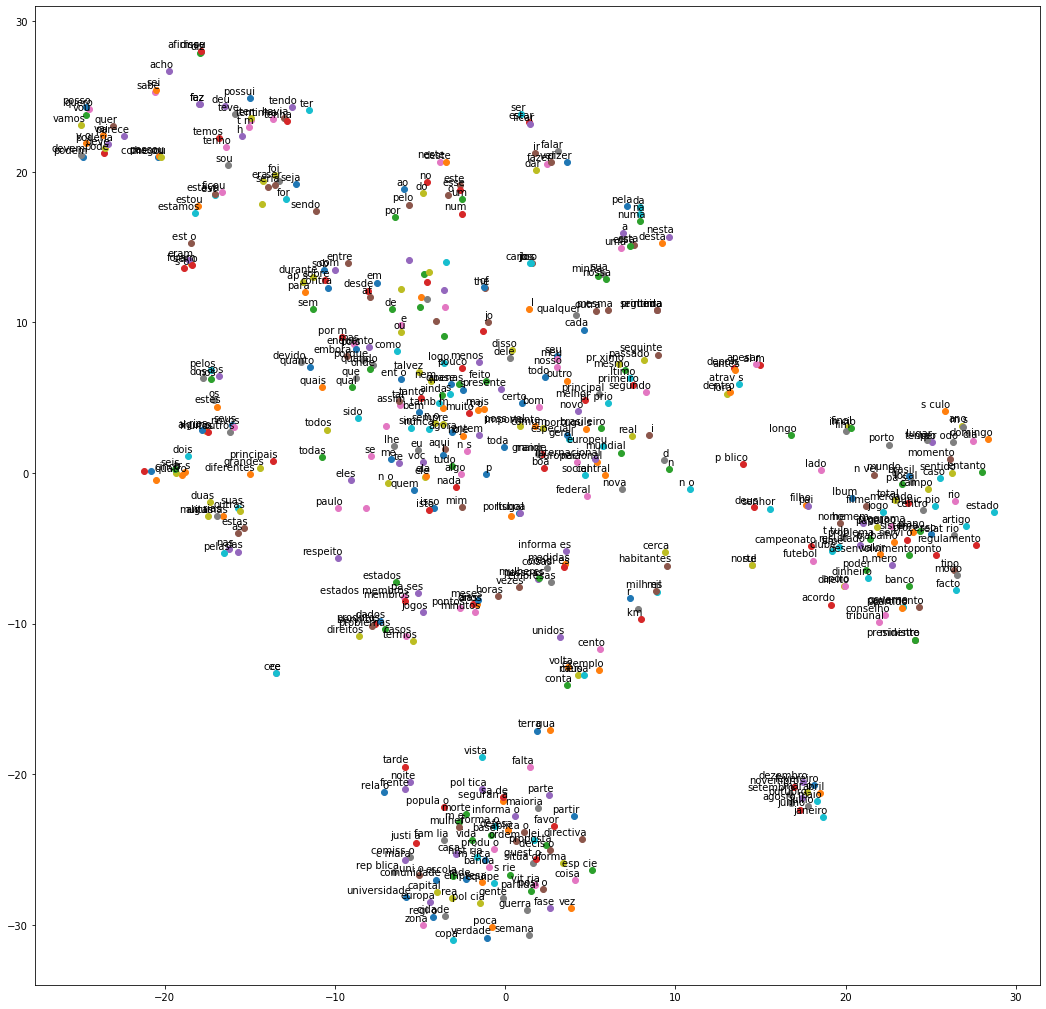

In [ ]:
tsne = TSNE(n_components=2)
low_dim_embedding = tsne.fit_transform(embedding)

# plota o gráfico
plot_with_labels(low_dim_embedding, words)

## GloVe

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip' -O glove.zip
!unzip glove.zip -d glove

file = 'glove/glove.6B.50d.txt'
# file = 'glove/glove.6B.100d.txt'
# file = 'glove/glove.6B.200d.txt'
# file = 'glove/glove.6B.300d.txt'

# Exemplo interno do arquivo: business 0.023693 0.13316 0.023131 ...

embeddings_dict = {}

with open(file, 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), 
                  key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [ ]:
# find_closest_embeddings(embeddings_dict["king"])
# find_closest_embeddings(embeddings_dict["king"])[:5]

find_closest_embeddings(embeddings_dict["king"])[1:6]

In [ ]:
print(find_closest_embeddings(
        embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]) 
        [:5])

In [ ]:
tsne = TSNE(n_components=2, random_state=0)

# words = list(embeddings_dict.keys())
words = ['sister', 'brother', 'man', 'woman', 'uncle', 'aunt']

vectors = [embeddings_dict[word] for word in words]

Y = tsne.fit_transform(vectors[:250])

plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

# Modelo treinados da NILC

In [ ]:
# # fasttext cbow - 50 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/fasttext/cbow_s50.zip' -O fasttext_cbow_s50.zip
# !unzip fasttext_cbow_s50.zip -d fasttext
# file = 'fasttext/cbow_s50.txt'

# # fasttext skip-gram - 50 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/fasttext/skip_s50.zip' -O fasttext_skip_s50.zip
# !unzip fasttext_skip_s50.zip -d fasttext
# file = 'fasttext/skip_s50.txt'

# # fasttext cbow - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/fasttext/cbow_s300.zip' -O fasttext_cbow_s300.zip
# !unzip fasttext_cbow_s300.zip -d fasttext
# file = 'fasttext/cbow_s300.txt'

# # fasttext skip-gram - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/fasttext/skip_s300.zip' -O fasttext_skip_s50.zip
# !unzip fasttext_skip_s50.zip -d fasttext
# file = 'fasttext/skip_s300.txt'

# # wang2vec cbow - 50 dimensões
# !wget'http://143.107.183.175:22980/download.php?file=embeddings/wang2vec/cbow_s50.zip' -O wang2vec_cbow_s50.zip
# !unzip wang2vec_cbow_s50.zip -d wang2vec
# file = 'wang2vec/cbow_s50.txt'

# # wang2vec skip-gram - 50 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/wang2vec/skip_s50.zip' -O wang2vec_skip_s50.zip
# !unzip wang2vec_skip_s50.zip -d wang2vec
# file = 'wang2vec/skip_s50.txt'

# # wang2vec cbow - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/wang2vec/cbow_s300.zip' -O wang2vec_cbow_s300.zip
# !unzip wang2vec_cbow_s30.zip -d wang2vec
# file = 'wang2vec/cbow_s300.txt'

# # wang2vec skip-gram - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/wang2vec/skip_s300.zip' -O wang2vec_skip_s300.zip
# !unzip wang2vec_skip_s300.zip -d wang2vec
# file = 'wang2vec/skip_s300.txt'

# # glove cbow - 50 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s50.zip' -O glove_s50.zip
# !unzip glove_s50.zip -d glove
# file = 'glove/glove_s50.txt'

# # glove cbow - 300 dimensões
# !wget 'http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s300.zip' -O glove_s300.zip
# !unzip glove_s50.zip -d glove
# file = 'glove/glove_s300.txt'

# Bibliografia

[1] Kyubyong Park. “Pre-trained word vectors of 30+ languages”. Repositorio do GitLab. Endereço eletrônico: https://github.com/Kyubyong/wordvectors

[2] Sebastian Theiler. "Basics of Using Pre-trained GloVe Vectors in Python". Endereço eletrônico: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db